In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import re
import nltk
from nltk.stem import WordNetLemmatizer

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [12]:
df  = pd.read_excel("reviewlist.xlsx")
df.head()

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
1,1,4,4.0 out of 5 stars\nNice,Quality,13 November 2023
2,2,4,4.0 out of 5 stars\nGood,Well packed. Delivered within a day. The colou...,6 November 2023
3,3,4,4.0 out of 5 stars\nGood phone in low budget d...,"for basic usage Okay, I am not using it, so I ...",28 October 2023
4,4,4,4.0 out of 5 stars\nNice Product,Thank You,9 November 2023


In [13]:
df.drop(["Unnamed: 0", "Title" , "Review_Date"],inplace=True,axis=1)

In [14]:
df.head()

,Rating,Review
0,4,Very good and Stylish phone as compared to oth...
1,4,Quality
2,4,Well packed. Delivered within a day. The colou...
3,4,"for basic usage Okay, I am not using it, so I ..."
4,4,Thank You


In [15]:
import string
def remove_punctuation(text):
    return ''.join([i for i in text if i not in string.punctuation])

In [16]:
df["Review_clean"] = df["Review"].apply(lambda x: remove_punctuation(x))
df.head()

,Rating,Review,Review_clean
0,4,Very good and Stylish phone as compared to oth...,Very good and Stylish phone as compared to oth...
1,4,Quality,Quality
2,4,Well packed. Delivered within a day. The colou...,Well packed Delivered within a day The colour ...
3,4,"for basic usage Okay, I am not using it, so I ...",for basic usage Okay I am not using it so I do...
4,4,Thank You,Thank You


In [17]:
def textsplit(text):
    return text.split(' ')
df["Review_clean"] = df["Review_clean"].apply(lambda x : textsplit(x))
df.head()

,Rating,Review,Review_clean
0,4,Very good and Stylish phone as compared to oth...,"[Very, good, and, Stylish, phone, as, compared..."
1,4,Quality,[Quality]
2,4,Well packed. Delivered within a day. The colou...,"[Well, packed, Delivered, within, a, day, The,..."
3,4,"for basic usage Okay, I am not using it, so I ...","[for, basic, usage, Okay, I, am, not, using, i..."
4,4,Thank You,"[Thank, You]"


In [19]:
wnl = WordNetLemmatizer()

In [20]:
def lemmatizer(text):
    return[wnl.lemmatize(w, pos='v') for w in text]

In [22]:
df["Review_clean"] = df["Review_clean"].apply(lambda x: lemmatizer(x))

In [23]:
df.head()

,Rating,Review,Review_clean
0,4,Very good and Stylish phone as compared to oth...,"[Very, good, and, Stylish, phone, as, compare,..."
1,4,Quality,[Quality]
2,4,Well packed. Delivered within a day. The colou...,"[Well, pack, Delivered, within, a, day, The, c..."
3,4,"for basic usage Okay, I am not using it, so I ...","[for, basic, usage, Okay, I, be, not, use, it,..."
4,4,Thank You,"[Thank, You]"


In [24]:
def join_words (list_words):
    return ' '.join(words for words in list_words)
df["Review_clean"] = df["Review_clean"].apply(lambda x: join_words(x))
df.head()

,Rating,Review,Review_clean
0,4,Very good and Stylish phone as compared to oth...,Very good and Stylish phone as compare to othe...
1,4,Quality,Quality
2,4,Well packed. Delivered within a day. The colou...,Well pack Delivered within a day The colour of...
3,4,"for basic usage Okay, I am not using it, so I ...",for basic usage Okay I be not use it so I dont...
4,4,Thank You,Thank You


In [26]:
all_words = ' '.join([word for word in df["Review_clean"]])
all_words

'Very good and Stylish phone as compare to other phone all the function be like iPhone in India there be a poor population as compare to foreign countries so I think thatthat people of India able to buy this phone from brand one plus only the minor problem in the phone be thatthat it consume its 20  battery very fast but rest of 80 of battery work very well it work approximately 40 hours after charge I charge my phone after a day only one problem that 20  battery losses early otherwise very good phone I suggest Indians buy this phone and request to oneplus dont increase the rate of this phone from 16000 I want to buy in 15000 but I buy it in the end of 16000 in EMI S I segesst to one plus if its rate equal to 15000 in Great Indian festival then I will baught one more in fact when I show my oneplus to my neighbour they be very impress and want to buy this phone but in budget of 15k overall full mark to oneplus great product from the gallary of oneplus thank you Quality Well pack Deliver

In [29]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [30]:
tokenized_words

['Very',
 'good',
 'and',
 'Stylish',
 'phone',
 'as',
 'compare',
 'to',
 'other',
 'phone',
 'all',
 'the',
 'function',
 'be',
 'like',
 'iPhone',
 'in',
 'India',
 'there',
 'be',
 'a',
 'poor',
 'population',
 'as',
 'compare',
 'to',
 'foreign',
 'countries',
 'so',
 'I',
 'think',
 'thatthat',
 'people',
 'of',
 'India',
 'able',
 'to',
 'buy',
 'this',
 'phone',
 'from',
 'brand',
 'one',
 'plus',
 'only',
 'the',
 'minor',
 'problem',
 'in',
 'the',
 'phone',
 'be',
 'thatthat',
 'it',
 'consume',
 'its',
 '20',
 'battery',
 'very',
 'fast',
 'but',
 'rest',
 'of',
 '80',
 'of',
 'battery',
 'work',
 'very',
 'well',
 'it',
 'work',
 'approximately',
 '40',
 'hours',
 'after',
 'charge',
 'I',
 'charge',
 'my',
 'phone',
 'after',
 'a',
 'day',
 'only',
 'one',
 'problem',
 'that',
 '20',
 'battery',
 'losses',
 'early',
 'otherwise',
 'very',
 'good',
 'phone',
 'I',
 'suggest',
 'Indians',
 'buy',
 'this',
 'phone',
 'and',
 'request',
 'to',
 'oneplus',
 'dont',
 'increase'

In [31]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'phone': 17, 'be': 16, 'to': 14, 'I': 12, 'good': 11, 'in': 11, 'the': 10, 'of': 10, 'hai': 8, 'and': 6, ...})

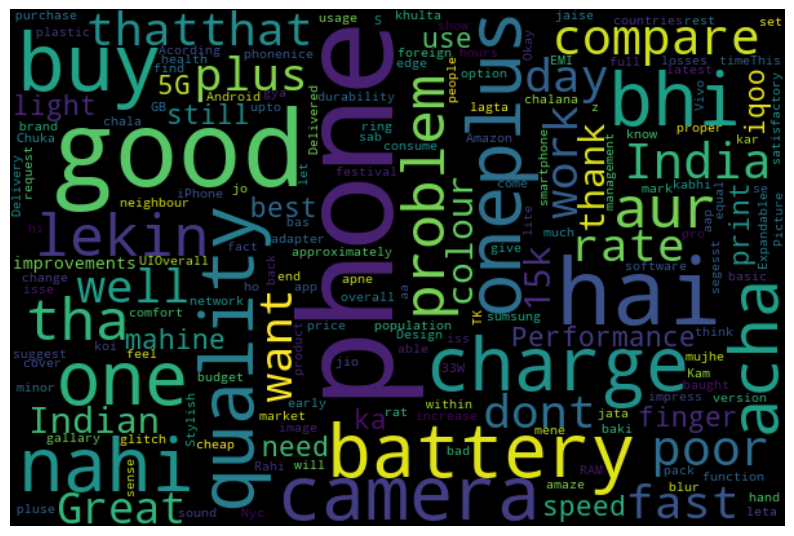

In [32]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [33]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)


In [34]:
fd.most_common()

[('phone', 17),
 ('be', 16),
 ('to', 14),
 ('I', 12),
 ('good', 11),
 ('in', 11),
 ('the', 10),
 ('of', 10),
 ('hai', 8),
 ('and', 6),
 ('buy', 6),
 ('this', 6),
 ('one', 5),
 ('but', 5),
 ('charge', 5),
 ('bhi', 5),
 ('nahi', 5),
 ('a', 4),
 ('it', 4),
 ('battery', 4),
 ('very', 4),
 ('oneplus', 4),
 ('quality', 4),
 ('acha', 4),
 ('camera', 4),
 ('from', 3),
 ('problem', 3),
 ('my', 3),
 ('with', 3),
 ('for', 3),
 ('not', 3),
 ('lekin', 3),
 ('me', 3),
 ('tha', 3),
 ('as', 2),
 ('compare', 2),
 ('like', 2),
 ('India', 2),
 ('there', 2),
 ('so', 2),
 ('thatthat', 2),
 ('plus', 2),
 ('only', 2),
 ('its', 2),
 ('20', 2),
 ('fast', 2),
 ('work', 2),
 ('after', 2),
 ('day', 2),
 ('that', 2),
 ('otherwise', 2),
 ('dont', 2),
 ('rate', 2),
 ('16000', 2),
 ('want', 2),
 ('15000', 2),
 ('15k', 2),
 ('colour', 2),
 ('light', 2),
 ('use', 2),
 ('aur', 2),
 ('finger', 2),
 ('print', 2),
 ('ka', 2),
 ('iqoo', 2),
 ('speed', 2),
 ('mahine', 2),
 ('5G', 2),
 ('still', 2),
 ('need', 2),
 ('improveme

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

In [37]:
df["polarity"] = df["Review_clean"].apply(lambda x: analyzer.polarity_scores(x))
df.head()

,Rating,Review,Review_clean,polarity
0,4,Very good and Stylish phone as compared to oth...,Very good and Stylish phone as compare to othe...,"{'neg': 0.062, 'neu': 0.765, 'pos': 0.173, 'co..."
1,4,Quality,Quality,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,4,Well packed. Delivered within a day. The colou...,Well pack Delivered within a day The colour of...,"{'neg': 0.081, 'neu': 0.547, 'pos': 0.372, 'co..."
3,4,"for basic usage Okay, I am not using it, so I ...",for basic usage Okay I be not use it so I dont...,"{'neg': 0.122, 'neu': 0.685, 'pos': 0.193, 'co..."
4,4,Thank You,Thank You,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp..."


In [38]:
df = pd.concat(
    [df.drop(["polarity"], axis=1), 
     df["polarity"].apply(pd.Series)], axis=1)

In [39]:
df.head()

,Rating,Review,Review_clean,neg,neu,pos,compound
0,4,Very good and Stylish phone as compared to oth...,Very good and Stylish phone as compare to othe...,0.062,0.765,0.173,0.9772
1,4,Quality,Quality,0.000,1.000,0.000,0.0000
2,4,Well packed. Delivered within a day. The colou...,Well pack Delivered within a day The colour of...,0.081,0.547,0.372,0.8807
3,4,"for basic usage Okay, I am not using it, so I ...",for basic usage Okay I be not use it so I dont...,0.122,0.685,0.193,0.4191
4,4,Thank You,Thank You,0.000,0.286,0.714,0.3612


In [43]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(10)

,Rating,Review,Review_clean,neg,neu,pos,compound,sentiment
0,4,Very good and Stylish phone as compared to oth...,Very good and Stylish phone as compare to othe...,0.062,0.765,0.173,0.9772,positive
1,4,Quality,Quality,0.000,1.000,0.000,0.0000,neutral
2,4,Well packed. Delivered within a day. The colou...,Well pack Delivered within a day The colour of...,0.081,0.547,0.372,0.8807,positive
3,4,"for basic usage Okay, I am not using it, so I ...",for basic usage Okay I be not use it so I dont...,0.122,0.685,0.193,0.4191,positive
4,4,Thank You,Thank You,0.000,0.286,0.714,0.3612,positive
5,5,Nyc charging and sound quality 😀😀Aur software ...,Nyc charge and sound quality 😀😀Aur software bh...,0.053,0.890,0.057,0.1280,positive
6,4,Acording to price of this phone.nice camera qu...,Acording to price of this phonenice camera qua...,0.000,1.000,0.000,0.0000,neutral
7,4,Best smartphone in market,Best smartphone in market,0.000,0.417,0.583,0.6369,positive
8,4,Camera quality not satisfactory,Camera quality not satisfactory,0.413,0.587,0.000,-0.2755,negative
9,4,I purchased OnePlus phone on Amazon. Delivery ...,I purchase OnePlus phone on Amazon Delivery be...,0.032,0.772,0.195,0.9032,positive


In [44]:
import seaborn as sns

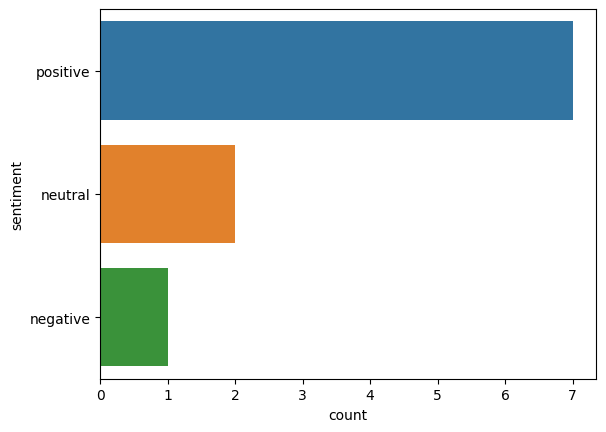

In [45]:
sns.countplot(y="sentiment",data=df)
plt.show()